In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')
sns.set(font_scale=1.5) 

%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [8]:
from CNN2 import CNN 

In [10]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cnn_model = CNN()  # Create a new instance of CNN
cnn_model.load_state_dict(torch.load('cnn_model.pth'))  # Load saved parameters
cnn_model.to(DEVICE) 

/var/folders/z_/xvvp4h796z9ggg4w6w81n__m0000gq/T/ipykernel_21077/4215959329.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('cnn_mod

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=204

In [11]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 26, 26).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(9), ps)
    ax2.set_aspect(2)
    ax2.set_yticks(np.arange(9))
    ax2.set_yticklabels(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none'])
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 15)

    plt.tight_layout()

In [57]:
def label_description(i):
    if i == 0:
        return "Center"
    elif i == 1:
        return "Donut"
    elif i == 2:
        return "Edge-Loc"
    elif i == 3:
        return "Edge-Ring"
    elif i == 4:
        return "Loc"
    elif i == 5:
        return "Near-full"
    elif i == 6:
        return "Random"
    elif i == 7:
        return "Scratch"
    elif i == 8:
        return "None"
    else:
        return "Unknown label"

# Example usage:
for i in range(9):
    print(f"i: {i}, l: {label_description(i)}")

i: 0, l: Center
i: 1, l: Donut
i: 2, l: Edge-Loc
i: 3, l: Edge-Ring
i: 4, l: Loc
i: 5, l: Near-full
i: 6, l: Random
i: 7, l: Scratch
i: 8, l: None


In [69]:
def make_predict(tensor, model):
    tensor = tensor.unsqueeze(0).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        ps = model(tensor).detach().cpu().numpy()[0]
        probabilities = np.exp(ps)
        print("Probabilities:", probabilities)
        predicted_class = np.argmax(probabilities)
        label_desc = label_description(predicted_class)
        print(f'Predicted class: {predicted_class} - {label_desc}')
    view_classify(tensor.view(1, 26, 26).cpu(), probabilities)

In [70]:
df = pd.read_csv('resize_x_csv_files/resize_x_17.csv')

In [71]:
import torch
array = df.to_numpy()
tensor = torch.tensor(array, dtype=torch.float)

Probabilities: [6.06766669e-04 1.15851745e-10 4.61353958e-01 1.51034746e+01
 5.30722245e-05 5.05518354e-03 2.61346288e-02 2.12887325e+01
 4.16097119e-02]
Predicted class: 7 - Scratch


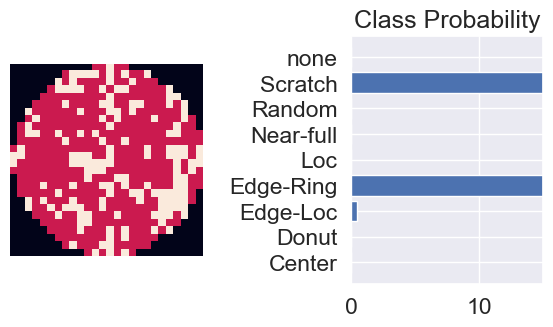

In [72]:
make_predict(tensor,cnn_model)

In [37]:
tensor.shape

torch.Size([26, 26])